In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
file_path = "../../churn_data.csv"
df = pd.read_csv(file_path)


df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   gender            7042 non-null   object 
 2   SeniorCitizen     7042 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   MultipleLines     7042 non-null   object 
 6   InternetService   7042 non-null   object 
 7   OnlineSecurity    7042 non-null   object 
 8   OnlineBackup      7042 non-null   object 
 9   DeviceProtection  7042 non-null   object 
 10  TechSupport       7042 non-null   object 
 11  StreamingTV       7042 non-null   object 
 12  StreamingMovies   7042 non-null   object 
 13  Unnamed: 13       0 non-null      float64
 14  tenure            7042 non-null   int64  
 15  PhoneService      7042 non-null   object 
 16  Contract          7042 non-null   object 


In [ ]:
df.drop(columns=["customerID", "Unnamed: 13"], inplace=True)

In [ ]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   MultipleLines     7042 non-null   object 
 5   InternetService   7042 non-null   object 
 6   OnlineSecurity    7042 non-null   object 
 7   OnlineBackup      7042 non-null   object 
 8   DeviceProtection  7042 non-null   object 
 9   TechSupport       7042 non-null   object 
 10  StreamingTV       7042 non-null   object 
 11  StreamingMovies   7042 non-null   object 
 12  tenure            7042 non-null   int64  
 13  PhoneService      7042 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

<ipython-input-33-19df7130badd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   MultipleLines     7042 non-null   object 
 5   InternetService   7042 non-null   object 
 6   OnlineSecurity    7042 non-null   object 
 7   OnlineBackup      7042 non-null   object 
 8   DeviceProtection  7042 non-null   object 
 9   TechSupport       7042 non-null   object 
 10  StreamingTV       7042 non-null   object 
 11  StreamingMovies   7042 non-null   object 
 12  tenure            7042 non-null   int64  
 13  PhoneService      7042 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7042 non-null   object 


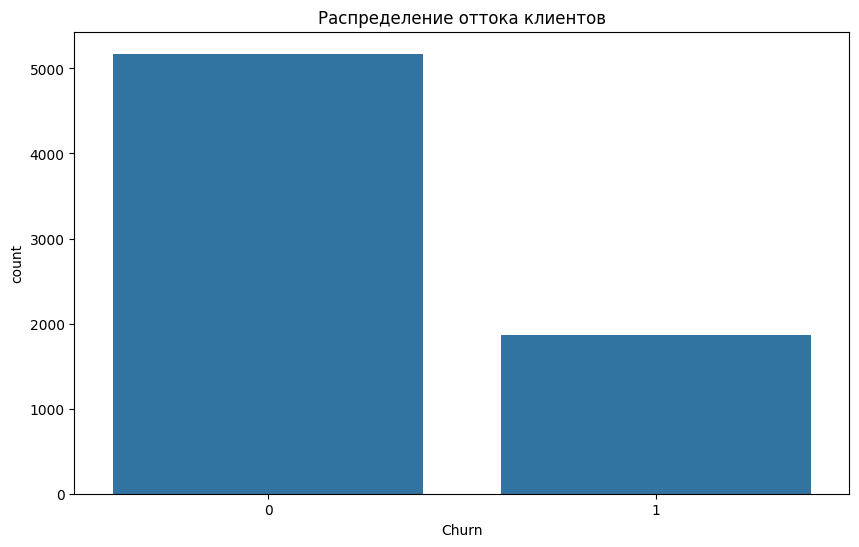

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Churn", data=df)
plt.title("Распределение оттока клиентов")
plt.show()

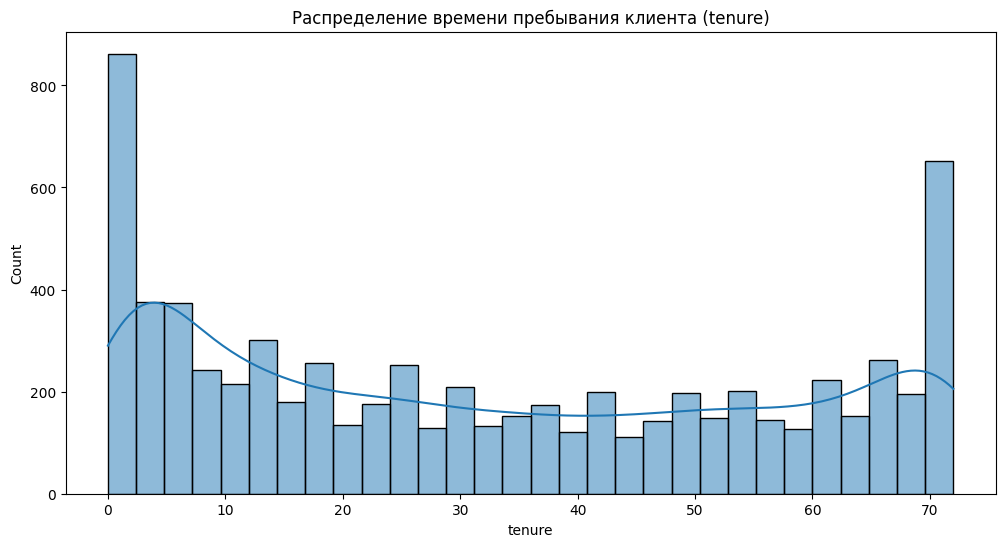

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Распределение времени пребывания клиента (tenure)")
plt.show()

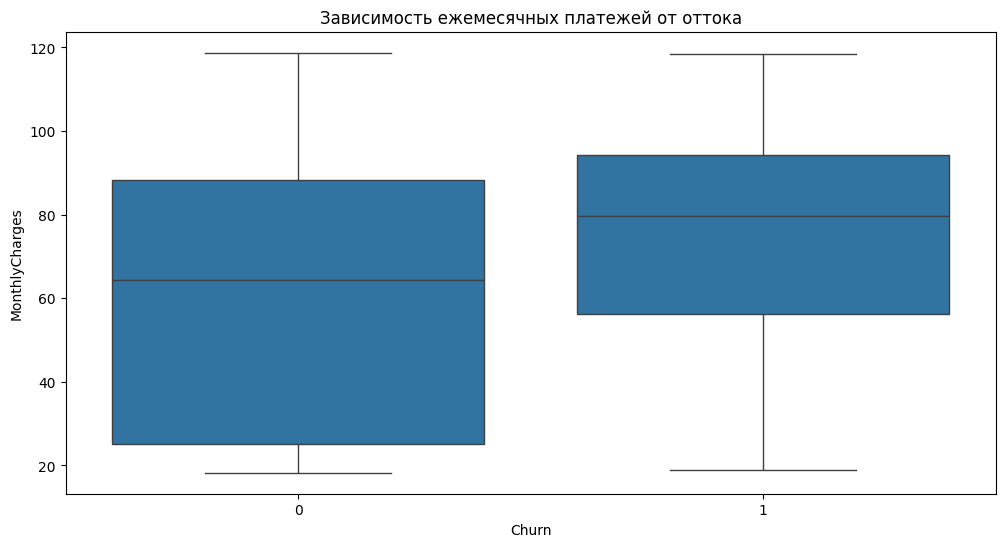

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Зависимость ежемесячных платежей от оттока")
plt.show()

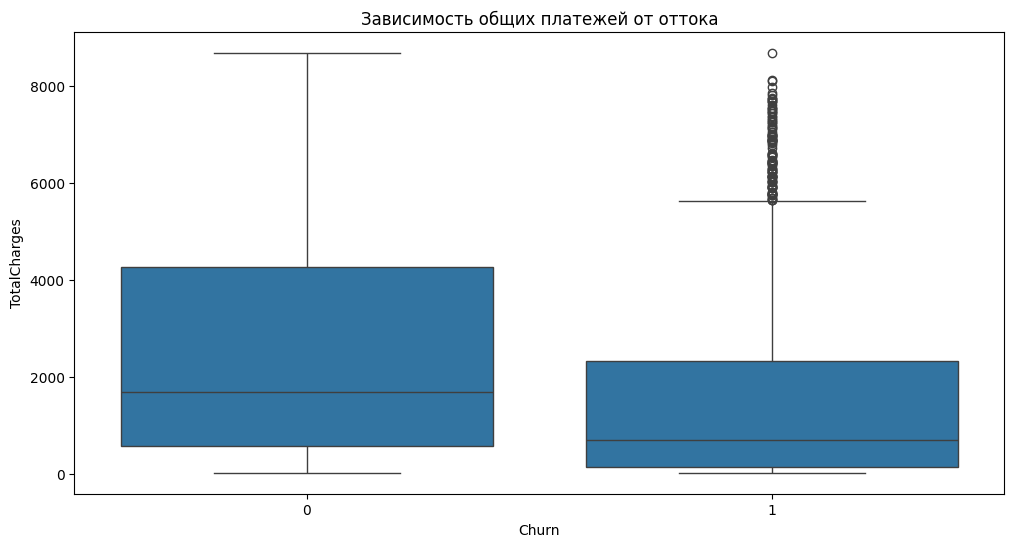

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Зависимость общих платежей от оттока")
plt.show()

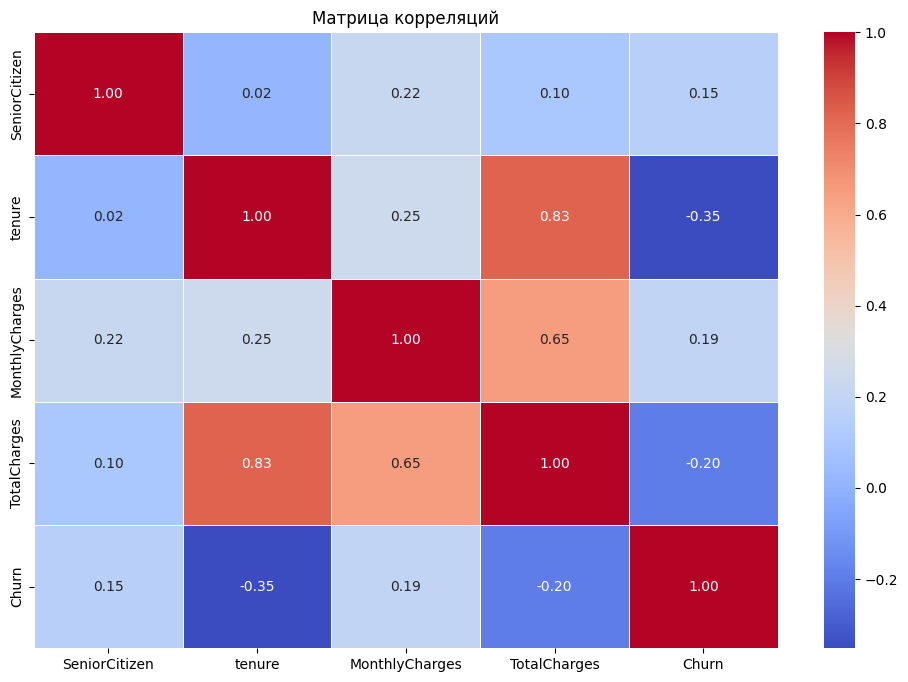

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций")
plt.show()


In [ ]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

cat_feats = X.select_dtypes(include=["object"]).columns.tolist()
num_feats = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

prep = ColumnTransformer([
    ("num", StandardScaler(), num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train = prep.fit_transform(X_train)
X_test = prep.transform(X_test)


сверху я разделил выборку на обчучающуу и для тестов

In [ ]:
m = LogisticRegression(max_iter=1000, random_state=52)
m.fit(X_train, y_train)

y_pred = m.predict(X_test)

acc = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print("Classification Report:\n", clf_report)



Accuracy: 0.8091
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

